<a href="https://colab.research.google.com/github/agnesrm/dados/blob/main/Atividade_Pr%C3%A1tica_Aula_5_Respondido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports das Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import normalized_mutual_info_score, silhouette_score, pairwise_distances
from sklearn.cluster import KMeans, SpectralClustering

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.manifold import TSNE

from sklearn.neighbors import kneighbors_graph
import networkx as nx

import glob
import cv2

# Construir o dataset

In [ ]:
images_path = glob.glob('./images/*.png')

raw_data = []

for path in images_path:
  colored_img = cv2.imread(path)
  gray_img = cv2.cvtColor(colored_img, cv2.COLOR_BGR2GRAY)

  features_img = gray_img.flatten()
  raw_data.append(features_img)

In [ ]:
# raw_data = np.sort(np.array(raw_data), axis=0)
X = pd.DataFrame(raw_data)

In [ ]:
y_true = [int(img.split('__')[0].split('obj')[1]) for img in images_path]

# Análise Exploratória Inicial

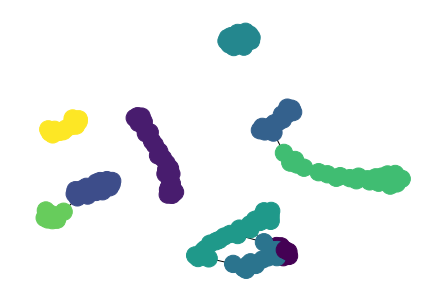

In [ ]:
S = kneighbors_graph(X, n_neighbors=5, metric='euclidean')
G = nx.from_scipy_sparse_array(S)
nx.draw(G, node_color=y_true)

# PCA

<BarContainer object of 10 artists>

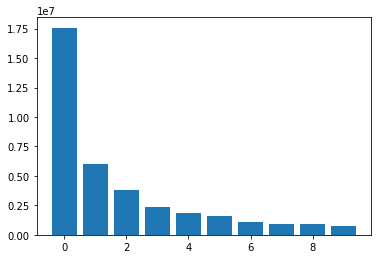

In [ ]:
pca = PCA(n_components=10).fit(X)
plt.bar(range(10), pca.explained_variance_)

In [ ]:
X_new_PCA = PCA(n_components=5).fit_transform(X)

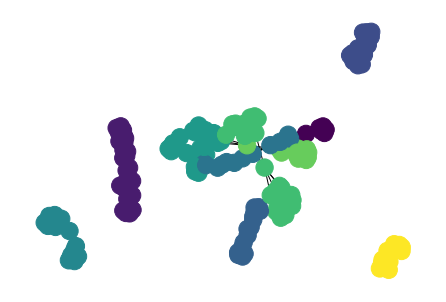

In [ ]:
S_PCA = kneighbors_graph(X_new_PCA, n_neighbors=5, metric='euclidean')
G_PCA = nx.from_scipy_sparse_array(S_PCA)
nx.draw(G_PCA, node_color=y_true)

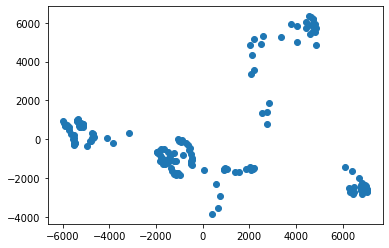

In [ ]:
plt.scatter(X_new_PCA[:, 0], X_new_PCA[:, 1])

# Análise de Modelos

### Antes

In [ ]:
y_kmeans = KMeans(n_clusters=10, n_init='auto').fit_predict(X)
y_spectral = SpectralClustering(n_clusters=10, n_neighbors=5, affinity='precomputed_nearest_neighbors').fit_predict(S)

sil_kmeans = silhouette_score(X, y_kmeans, metric='euclidean')
sil_spectral = silhouette_score(X, y_spectral, metric='euclidean')

nmi_kmeans = normalized_mutual_info_score(y_true, y_kmeans)
nmi_spectral = normalized_mutual_info_score(y_true, y_spectral)


print(f'Silhouette Kmeans: {sil_kmeans}')
print(f'Silhouette Spectral: {sil_spectral}')

print(f'NMI Kmeans: {nmi_kmeans}')
print(f'NMI Spectral: {nmi_spectral}')

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette Kmeans: 0.21336415326405989
Silhouette Spectral: 0.17385788684157505
NMI Kmeans: 0.8544533652128056
NMI Spectral: 0.9127110310889639


### Depois do PCA

In [ ]:
y_kmeans = KMeans(n_clusters=10, n_init='auto').fit_predict(X_new_PCA)
y_spectral = SpectralClustering(n_clusters=10, n_neighbors=5, affinity='precomputed_nearest_neighbors').fit_predict(S_PCA)

sil_kmeans = silhouette_score(X_new_PCA, y_kmeans, metric='euclidean')
sil_spectral = silhouette_score(X_new_PCA, y_spectral, metric='euclidean')

nmi_kmeans = normalized_mutual_info_score(y_true, y_kmeans)
nmi_spectral = normalized_mutual_info_score(y_true, y_spectral)


print(f'Silhouette Kmeans: {sil_kmeans}')
print(f'Silhouette Spectral: {sil_spectral}')

print(f'NMI Kmeans: {nmi_kmeans}')
print(f'NMI Spectral: {nmi_spectral}')

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette Kmeans: 0.6334259925642847
Silhouette Spectral: 0.15268629634144518
NMI Kmeans: 0.8556350558906082
NMI Spectral: 0.7599240353213631


### Depois TSNE

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette Kmeans: 0.6140045523643494
Silhouette Spectral: 0.05833921208977699
NMI Kmeans: 0.9149587836598766
NMI Spectral: 0.7737424518698619


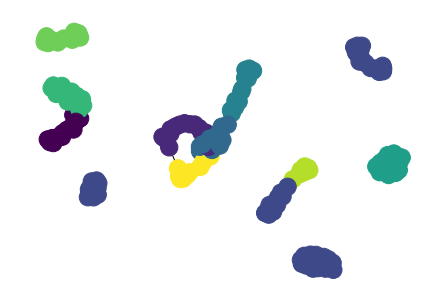

In [ ]:
X_new_TSNE = TSNE(n_components=2).fit_transform(X)

S_TSNE = kneighbors_graph(X_new_TSNE, n_neighbors=5, metric='euclidean')
G2 = nx.from_scipy_sparse_array(S_TSNE)
nx.draw(G2, node_color=y_spectral)

y_kmeans = KMeans(n_clusters=10, n_init='auto').fit_predict(X_new_TSNE)
y_spectral = SpectralClustering(n_clusters=10, n_neighbors=5, affinity='precomputed_nearest_neighbors').fit_predict(S_TSNE)


sil_kmeans = silhouette_score(X_new_TSNE, y_kmeans, metric='euclidean')
sil_spectral = silhouette_score(X_new_TSNE, y_spectral, metric='euclidean')

nmi_kmeans = normalized_mutual_info_score(y_true, y_kmeans)
nmi_spectral = normalized_mutual_info_score(y_true, y_spectral)


print(f'Silhouette Kmeans: {sil_kmeans}')
print(f'Silhouette Spectral: {sil_spectral}')

print(f'NMI Kmeans: {nmi_kmeans}')
print(f'NMI Spectral: {nmi_spectral}')